# Capstone Project

### Predicting  Telecom Customer Churn : A Comparative Study of Machine Learning Models

I041 Devesh Pawar

I052 Yaashie Sabla

I062 Nishil Tayal

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [5]:
#Read the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 


In [6]:
df.shape 

(7043, 21)

In [7]:
len(df)

7043

## Initial data preparation

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
#to fill the missing values

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [12]:
#making column names more standardized by removing spaces


df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [13]:
#preprocessing step when dealing with binary classification


df.churn = (df.churn == 'yes').astype(int)

In [14]:
#output of the above preprocessing steps


df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## Exploratory data analysis

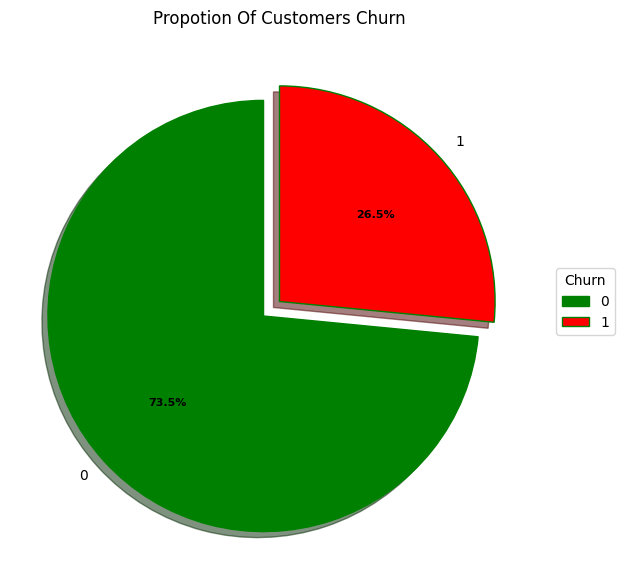

In [15]:
# Creating plot
att=df['churn'].value_counts(normalize=True)
explode = (0.1, 0.0, )
 
# Creating color parameters
colors = ( "green", "red")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(att,
                                  autopct = lambda pct: func(pct, att),
                                  explode = explode,
                                  labels = att.index,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, att.index,
          title ="Churn",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Propotion Of Customers Churn")
 
# show plot
plt.show()

C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

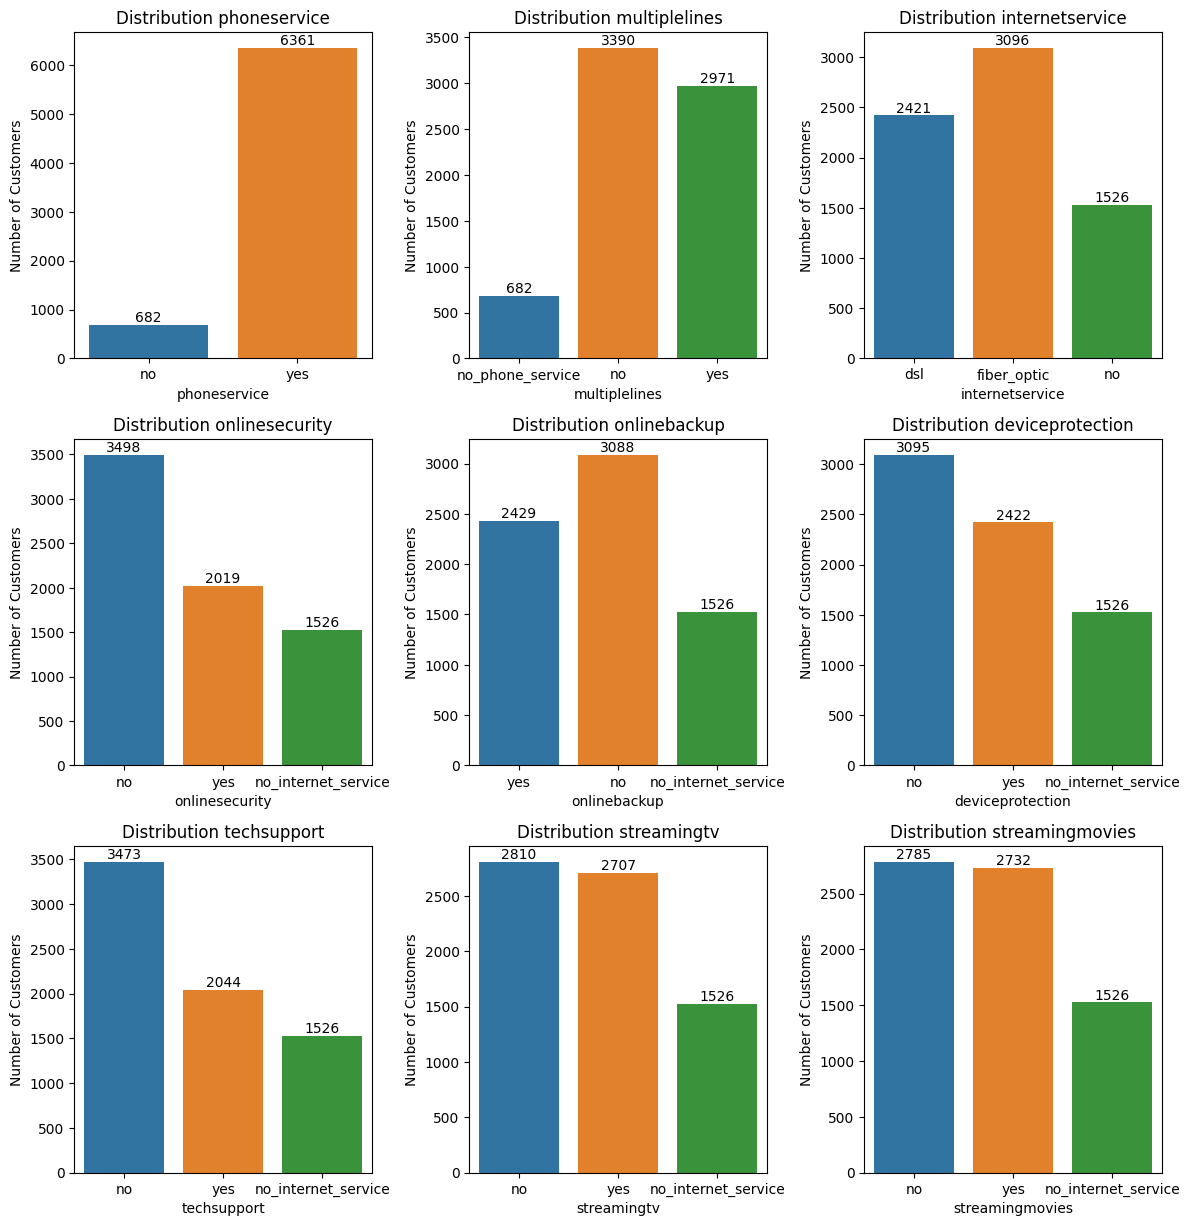

In [16]:
features = ["phoneservice","multiplelines","internetservice","onlinesecurity","onlinebackup","deviceprotection","techsupport","streamingtv","streamingmovies"]
plt.figure(figsize = (12,16))
for i in range(0,len(features)):
  plt.subplot(4, len(features)//3, i+1)
  ax = sns.countplot(x=df[features[i]])
  ax.bar_label(ax.containers[0], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

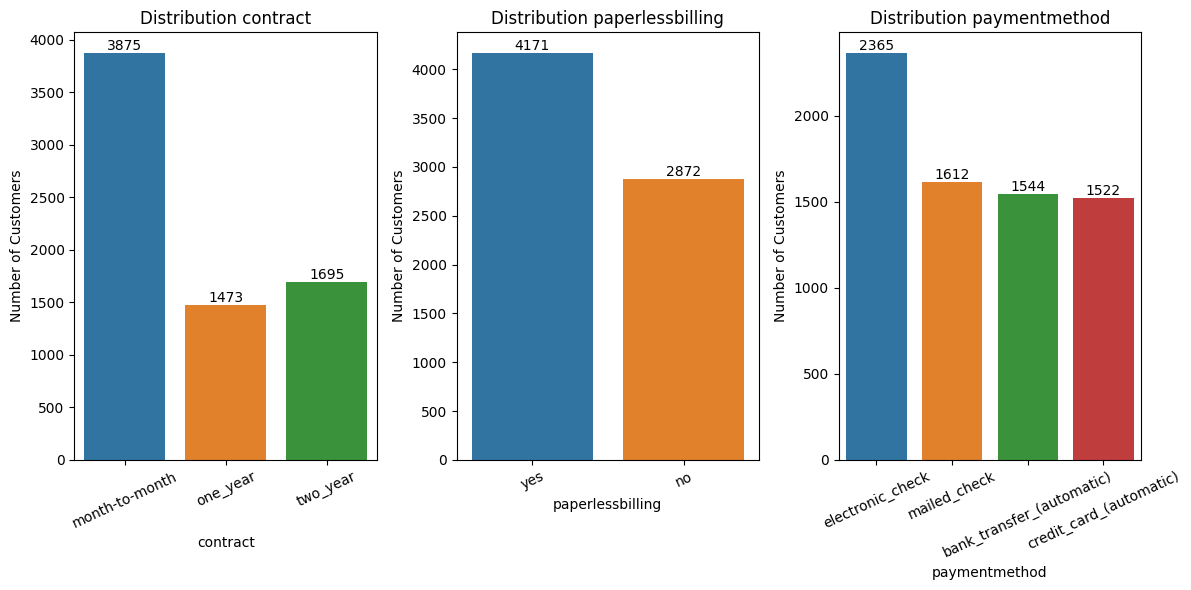

In [17]:
features = ["contract","paperlessbilling","paymentmethod",]
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
  plt.subplot(1, len(features), i+1)
  ax = sns.countplot(x=df[features[i]])
  ax.bar_label(ax.containers[0], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.xticks(rotation = 25)
  plt.tight_layout()

C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

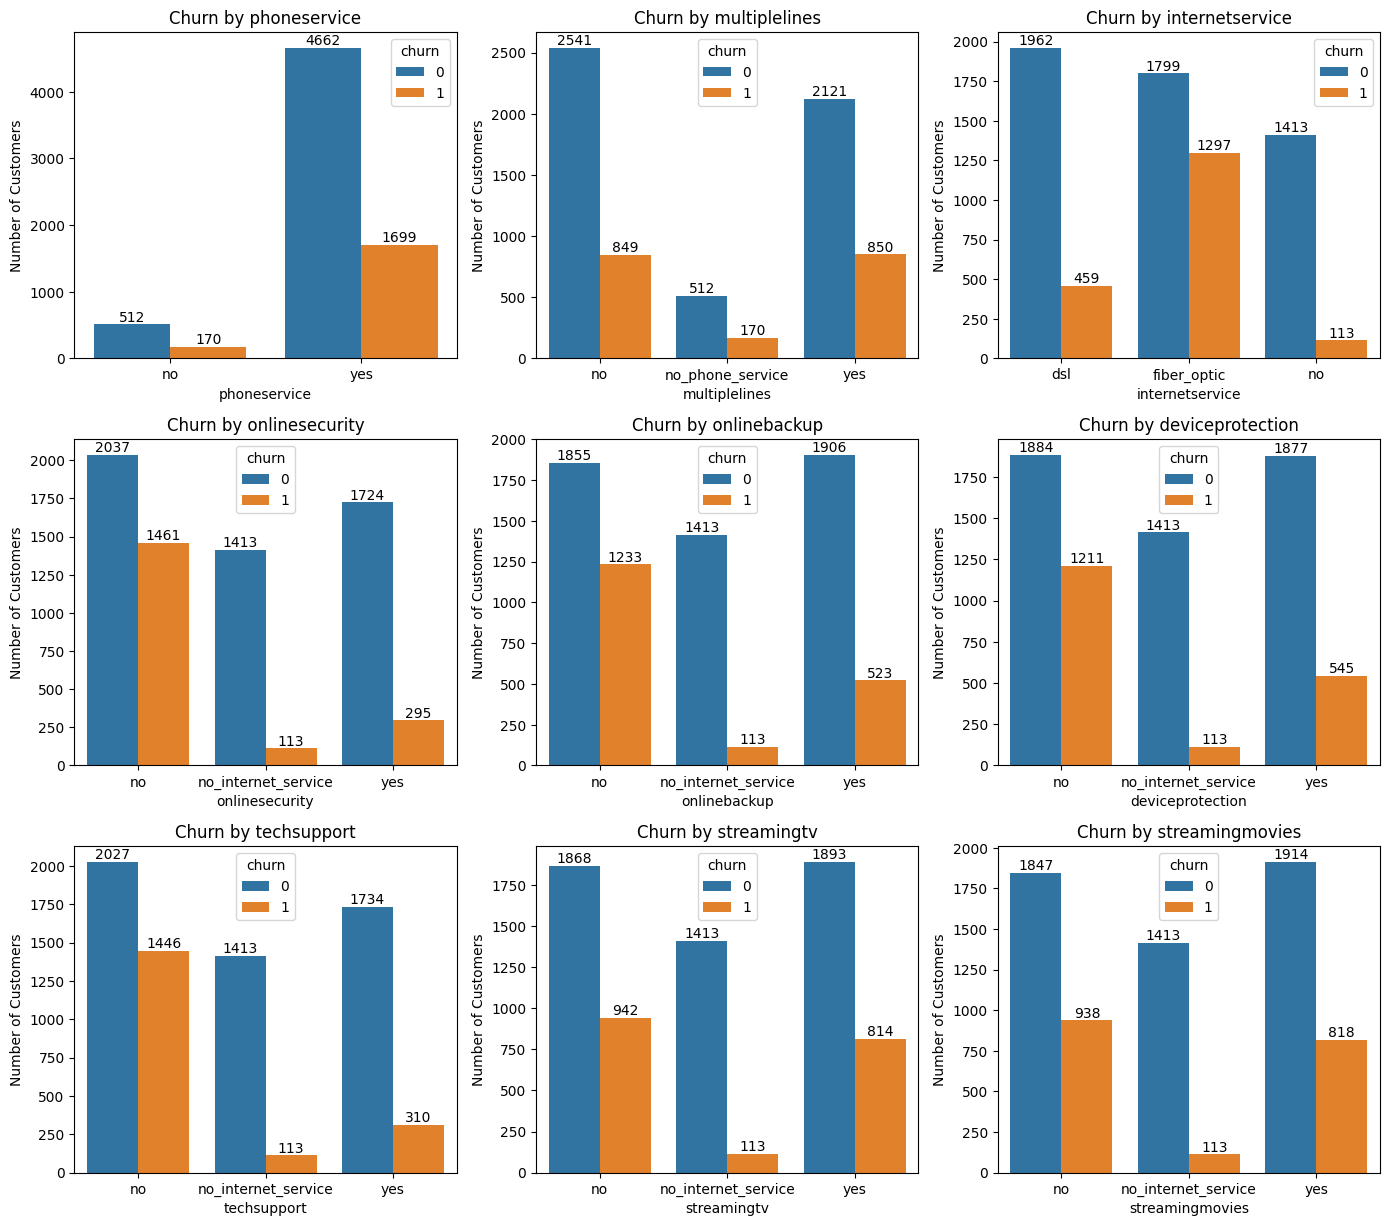

In [18]:
features = ["phoneservice","multiplelines","internetservice","onlinesecurity","onlinebackup","deviceprotection","techsupport","streamingtv","streamingmovies"]
plt.figure(figsize = (14,16))
for i in range(0,len(features)):
  churn_service = df.groupby(features[i],as_index = False)["churn"].value_counts()
  plt.subplot(4, len(features)//3, i+1)
  ax = sns.barplot(x=features[i], y = "count", hue="churn", data = churn_service)
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Churn by " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

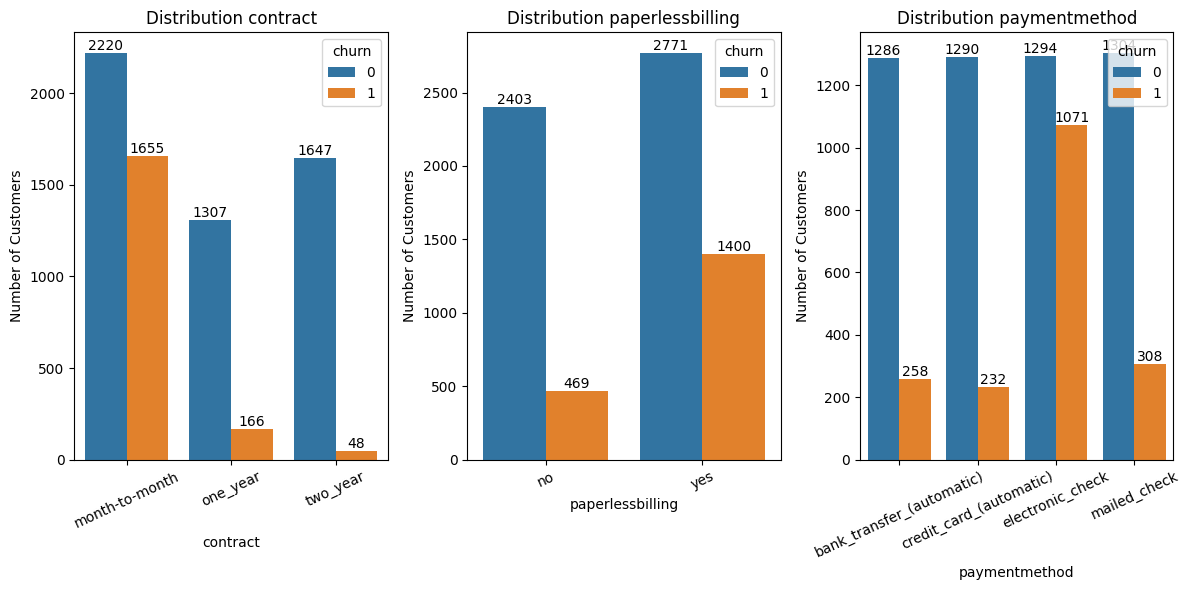

In [19]:
features = ["contract","paperlessbilling","paymentmethod",]
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
  churn_jenispembayaran = df.groupby(features[i],as_index = False)["churn"].value_counts()
  plt.subplot(1, len(features), i+1)
  ax = sns.barplot(x=features[i], y = "count", hue="churn", data = churn_jenispembayaran)
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.xticks(rotation = 25)
  plt.tight_layout()

# Feature Engineering

In [20]:
#The model_selection module contains functions and classes 
# for splitting datasets, cross-validation, and other utilities
# related to model evaluation and training

from sklearn.model_selection import train_test_split

In [21]:
#split dataset into training and test
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [22]:
#split training dataset into training and validation

df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [23]:
#preprocessing
#making numpy of churn column for both train and validation

y_train = df_train.churn.values
y_val = df_val.churn.values

In [24]:
#delete the churn column from both datasets

del df_train['churn']
del df_val['churn']

In [25]:
#represent the number of missing values in each column

df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

It indicates that the data is complete and ready for further preprocessing, feature engineering, and model development without the need to handle missing values.

In [26]:
#display the no of customers who've churnned and those who haven't
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [27]:
#mean of churn rate in df_train_full

global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [28]:
#splitting features in categorical and numerical for machine learning models

#non numeric values

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

#numeric

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [29]:
#give unique values for each

df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance

In [30]:
# gain insights into potential gender-related patterns in customer churn.

# churn rate specifically for female customers.

female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

#churn rate specifically for male customers.
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


* If female_mean / global_mean is greater than 1, it indicates that the churn rate for female customers is higher than the overall average, suggesting that female customers are more likely to churn compared to the entire dataset.
* If female_mean / global_mean is less than 1, it indicates that the churn rate for female customers is lower than the overall average, suggesting that female customers are less likely to churn compared to the entire dataset.
* If female_mean / global_mean is equal to 1, it suggests that the churn rate for female customers is the same as the overall average.

In [31]:
female_mean / global_mean

1.0253955354648652

* If male_mean / global_mean is greater than 1, it indicates that the churn rate for male customers is higher than the overall average, suggesting that male customers are more likely to churn compared to the entire dataset.
* If male_mean / global_mean is less than 1, it indicates that the churn rate for male customers is lower than the overall average, suggesting that male customers are less likely to churn compared to the entire dataset.
* If male_mean / global_mean is equal to 1, it suggests that the churn rate for male customers is the same as the overall average.

In [32]:
male_mean / global_mean

0.9749802969838747

In [33]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [34]:
partner_yes / global_mean

0.7594724924338315

In [35]:
partner_no / global_mean

1.2216593879412643

In [36]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


These results suggest that, in  dataset, there is a modest difference in churn rates between female and male customers, with female customers having a slightly higher likelihood of churning compared to male customers. However, it's important to note that the differences are relatively small, and other factors may also play a role in customer churn behavior. Further analysis and modeling can help you explore and understand these factors in more detail.

In [37]:
from IPython.display import display

In [38]:
global_mean = df_train_full.churn.mean()
global_mean

0.26996805111821087

In [39]:
for col in categorical:  # This loop iterates through each categorical variable (col) listed in the categorical list.
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [40]:
#used to calculate the mutual information between two sets of data,
# which can be useful in feature selection

from sklearn.metrics import mutual_info_score

In [41]:
#calculates MI for each categorical variable and churn rate
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


In [42]:
df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [43]:
df_train_full.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


## One-hot encoding

In [44]:
#used to convert a list of dictionaries 
from sklearn.feature_extraction import DictVectorizer

In [45]:
# concatinate categorical and numerical
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [46]:
#represents the features and values for the first data point
train_dict[1]

{'gender': 'female',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 60,
 'monthlycharges': 100.5,
 'totalcharges': 6029.0}

In [47]:
# created an instance of the DictVectorizer class and then fit it in train_dict
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [48]:
# transform dict t0 numerical feature matrix.
X_train = dv.transform(train_dict)

In [49]:
#encoded representations of the features.
print(X_train)

[[0.00000e+00 0.00000e+00 1.00000e+00 ... 1.00000e+00 7.10000e+01
  6.04590e+03]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 6.00000e+01
  6.02900e+03]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 4.60000e+01
  2.06515e+03]
 ...
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 2.00000e+00
  2.83000e+01]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 2.30000e+01
  4.70600e+02]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 6.40000e+01
  5.32725e+03]]


In [50]:
X_train.shape

(3774, 45)

In [51]:
#These names represent the one-hot encoded categorical features
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

## Training logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [54]:
#make numerical representations of your validation data's features
val_dict_lr = df_val[categorical + numerical].to_dict(orient='records')
X_val_lr = dv.transform(val_dict_lr)

In [55]:
#obtain probablities
model.predict_proba(X_val_lr)

array([[0.76508893, 0.23491107],
       [0.7311339 , 0.2688661 ],
       [0.6805482 , 0.3194518 ],
       ...,
       [0.94274725, 0.05725275],
       [0.38476961, 0.61523039],
       [0.93872737, 0.06127263]])

In [56]:
y_pred_lr = model.predict_proba(X_val_lr)[:, 1]

In [57]:
# predicted probabilities of churn for each sample in validation data. 
y_pred_lr

array([0.23491107, 0.2688661 , 0.3194518 , ..., 0.05725275, 0.61523039,
       0.06127263])

In [58]:
#create boolean variable
churn_lr = y_pred_lr > 0.50

In [59]:
(y_val == churn_lr).mean()

0.8016129032258065

## Model interpretation

In [60]:
model.intercept_[0]

-0.12198863589816404

In [61]:
# how each feature contributes to the logistic regression model's predictions. 
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


These coefficients provide insights into how each feature affects the prediction of customer churn. Positive coefficients suggest that the presence or increase in the feature is associated with a higher likelihood of churn, while negative coefficients suggest the opposite. Features with coefficients close to zero have little impact on the prediction. These insights can be used for interpreting the model and making informed business decisions.

In [62]:
subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [63]:
model_small= LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [64]:
model_small.intercept_[0]

-0.577229912199359

In [65]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.866,
 'contract=one_year': -0.327,
 'contract=two_year': -1.117,
 'tenure': -0.094,
 'totalcharges': 0.001}

In [66]:
val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

In [67]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [68]:
y_pred_small

array([0.38725235, 0.23836386, 0.15070016, ..., 0.12069586, 0.55016623,
       0.03389637])

## Using the model

In [69]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [70]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.07332239057816664

In [71]:
print(list(X_test[0]))

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 79.85, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 41.0, 3320.75]


In [72]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month_to_month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 4,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [73]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.6961935402421786

As of now we've implemented till the logistic regression model. Now we will compre it with different algorithms and train the model with the algorithm that gives the best accuracy.

Upcoming part will be the training and deployment of the model with a user interactive web application which will help to predict the churn rate of the customer.

# Using XGBOOST

In [74]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import xgboost as xgb


In [76]:
model_xgb = xgb.XGBClassifier(random_state=1)
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [77]:

val_dict_xg = df_val[categorical + numerical].to_dict(orient='records')


X_val_xg = dv.transform(val_dict_xg)


In [78]:
model_xgb.predict_proba(X_val_xg)

array([[0.9466502 , 0.05334977],
       [0.807551  , 0.19244897],
       [0.89108074, 0.10891929],
       ...,
       [0.9939445 , 0.00605549],
       [0.49616367, 0.50383633],
       [0.8691856 , 0.13081436]], dtype=float32)

In [79]:
y_pred_xg=model_xgb.predict_proba(X_val_xg)[:, 1]

In [80]:
y_pred_xg

array([0.05334977, 0.19244897, 0.10891929, ..., 0.00605549, 0.50383633,
       0.13081436], dtype=float32)

In [81]:
churn_xg = y_pred_xg > 0.5

In [82]:
(y_val == churn_xg).mean()

0.7768817204301075

In [83]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 4,
    'monthlycharges': 25.7,
    'totalcharges': 200.7
}

X_test = dv.transform([customer])
churn_probability = model_xgb.predict_proba(X_test)[0, 1]
churn_probability

0.06945183

# Random Forset

In [84]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier


In [85]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [86]:
val_dict_rf = df_val[categorical + numerical].to_dict(orient='records')
X_val_rf = dv.transform(val_dict_rf)


In [87]:
model_rf.predict_log_proba(X_val_rf)

C:\Users\deves\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:913: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


array([[-0.16251893, -1.89711998],
       [-0.23572233, -1.56064775],
       [-0.38566248, -1.13943428],
       ...,
       [-0.03045921, -3.5065579 ],
       [-1.02165125, -0.4462871 ],
       [-0.12783337, -2.12026354]])

In [88]:
y_pred_rf = model_rf.predict_proba(X_val_rf)[:, 1]


In [89]:
y_pred_rf

array([0.15, 0.21, 0.32, ..., 0.03, 0.64, 0.12])

In [90]:
churn_rf = y_pred_rf > 0.5

In [91]:
(y_val == churn_rf).mean()

0.7784946236559139

In [92]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'yes',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'automatic',
    'tenure': 4,
    'monthlycharges': 85.7,
    'totalcharges': 850.7
}

X_test = dv.transform([customer])
churn_probability = model_rf.predict_proba(X_test)[0, 1]
churn_probability

0.48

In [93]:
from sklearn.metrics import accuracy_score

# Assuming you already have predictions for the validation data (y_pred_rf)
# If not, you can compute predictions using: y_pred_rf = model_rf.predict_proba(X_val)[:, 1]

# Convert probabilities to binary labels
churn_rf = y_pred_rf > 0.5

# Calculate accuracy
accuracy_rf = accuracy_score(y_val, churn_rf)

# Print the accuracy
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.78


# Decision Tree

In [94]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier


In [95]:
model_dt = DecisionTreeClassifier(max_depth=5, random_state=3)
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=3)

In [96]:
val_dict_dt = df_val[categorical + numerical].to_dict(orient='records')
X_val_dt = dv.transform(val_dict_dt)


In [97]:
model_dt.predict_proba(X_val_dt)

array([[0.76842105, 0.23157895],
       [0.84684685, 0.15315315],
       [0.84684685, 0.15315315],
       ...,
       [0.95942721, 0.04057279],
       [0.44144144, 0.55855856],
       [0.95942721, 0.04057279]])

In [98]:
y_pred_dt = model_dt.predict_proba(X_val_dt)[:, 1]


In [99]:
y_pred_dt

array([0.23157895, 0.15315315, 0.15315315, ..., 0.04057279, 0.55855856,
       0.04057279])

In [100]:
churn_dt= y_pred_dt > 0.5

In [101]:
(y_val == churn_dt).mean()

0.7865591397849462

In [102]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 4,
    'monthlycharges': 850.7,
    'totalcharges': 8500.7
}

In [103]:
X_test = dv.transform([customer])
churn_probability = model_dt.predict_proba(X_test)[0, 1]
churn_probability

0.6111111111111112

We trained the models and found that Logistic Regression gave the best accuracy for the threshold of 0.5. So we'll further delve into the performance metrics of Logistic Regression.

This is done in the Churn_model_metrics.ipynb